In [1]:
import glob
import os
import re

#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import palettable.colorbrewer.diverging as pld
import palettable.cartocolors.diverging as pld2
import palettable.colorbrewer.qualitative as pld3

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap

palette2 = pld2.Earth_6
cmap2 = palette2.mpl_colormap

palette3 = pld3.Dark2_6
cmap3 = palette3.mpl_colormap

transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


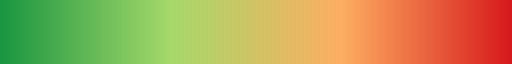

In [3]:
cmap

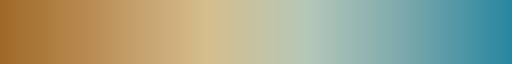

In [4]:
cmap2

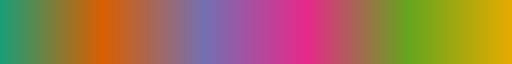

In [5]:
cmap3

In [6]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/2022081822'
subfolder = glob.glob(cwd + '/**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/2022081822/fluorescence_I


In [7]:
'OceanView' in cwd

True

In [8]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

# title = ['CsPb 6mM + Br 12 mM',
#          'CsPb 6mM + Br 12 mM + ZnI2 8uL/min', 
#          'CsPb 6mM + Br 12 mM + ZnI2 16uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 32uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 48uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 64uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 80uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 96uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 112uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 128uL/min']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label = ['CsPbBr',
#          'ZnI2 8 uL/min', 
#          'ZnI2 16 uL/min',
#          'ZnI2 32 uL/min',
#          'ZnI2 48 uL/min',
#          'ZnI2 64 uL/min', 
#          'ZnI2 80 uL/min',
#          'ZnI2 96 uL/min',
#          'ZnI2 112 uL/min',
#          'ZnI2 128 uL/min']
#          # 'ZnI2 128 uL/min']

fluorescence_I


In [9]:
# ## Reading dark and reference
# dark = glob.glob(cwd + '/' + 'Dark_100**.csv')
# ref = glob.glob(cwd + '/' + 'tol**100**.csv')

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [10]:
# plt.figure()
# plt.plot(ref_df.Energy, ref_df.Sample)

In [11]:
for i in range(len(subfolder)):
# for i in range(1):
    data = glob.glob(subfolder[i] + '/**.txt')
    # data_files = subfolder
    data_files = sorted(data, key = lambda x: (int(re.findall(r'\d+', x)[2]), int(re.findall(r'\d+', x)[4]), int(re.findall(r'\d+', x)[5])))

f = []
for i in range(len(data_files)):
    f.append(int(re.findall(r'CsPbBr3_Fl_I_(\d+)', data_files[i])[0]))

color = np.linspace(0, 1, 6)    
color_idx = np.asarray(f, dtype=float)

color_idx[color_idx==0] = color[0]
color_idx[color_idx==5] = color[1]
color_idx[color_idx==10] = color[2]
color_idx[color_idx==25] = color[3]
color_idx[color_idx==50] = color[4]
color_idx[color_idx==100] = color[5]
color_idx

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. ])

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


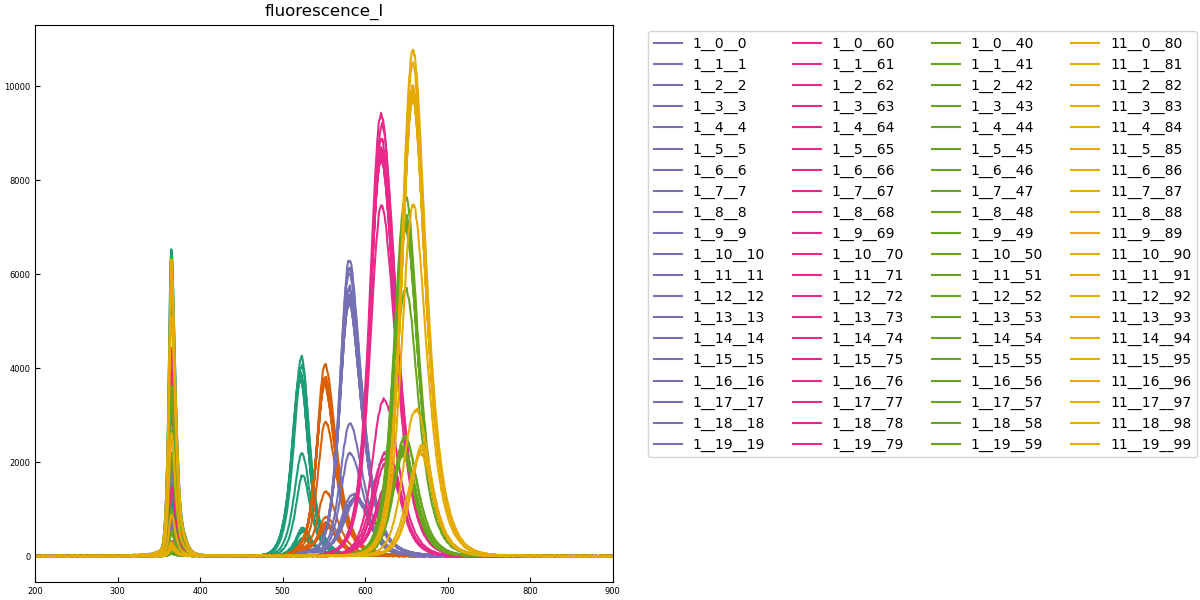

In [12]:
import warnings
warnings.filterwarnings(action='once')

## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(1, 1, figsize = (12, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 20
w2 = 770

for i in range(len(subfolder)):
    # data = glob.glob(subfolder[i] + '/**.txt')
    # data_files = sorted(data, key = lambda x: (int(re.findall(r'\d+', x)[2]), int(re.findall(r'\d+', x)[4]), int(re.findall(r'\d+', x)[5])))
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    # color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1.set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    # if i == 0: skiprows=8
    # else: skiprows=10
    
    for j in range(k1, k2):
        if 'OceanView' in cwd:
            df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
            PL = df_j['intensity']
            df_j['Energy'] = df_j['wavelength']          
        else:
            df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
            PL = df_j['Sample']-dark_df.Sample
        label = os.path.basename(data_files[j])[21:-4]
        df_j[label] = PL
        # ax1.plot(df_j.Energy, PL, color=cmap(color_idx[j-k1]), label=label)
        ax1.plot(df_j.Energy, PL, color=cmap3(color_idx[j-k1]), label=label)
        ax1.set_xlim(200, 900)
        # ax1[i].set_ylim(-0.1, max(absorbance[100:800])+0.2)
        ax1.tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        # df_i[label] = df_j['intensity']
        # df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, df_j[label]], axis=1, ignore_index=False)  
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

# ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
    
df['Energy'] = df_j.Energy
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

In [13]:
os.path.basename(data_files[0])[21:-4]

'__0__100'

In [14]:
df_i[210:215]

,__0__100,__1__101,__2__102,__3__103,__4__104,__5__105,__6__106,__7__107,__8__108,__9__109,...,11__10__90,11__11__91,11__12__92,11__13__93,11__14__94,11__15__95,11__16__96,11__17__97,11__18__98,11__19__99
210,1005.25,1019.88,1027.62,1022.12,1260.38,929.5,1649.75,4534.62,5624.25,5607,...,4995.25,2234.62,256.88,159.38,136.75,137.75,134.25,137.5,130.62,138.88
211,1154.25,1152.88,1162.62,1157.12,1450.38,1072.5,1894.75,5093.62,6256.25,6258,...,5632.25,2521.62,276.88,165.38,154.75,155.75,145.25,143.5,151.62,152.88
212,1213.25,1215.88,1258.62,1259.12,1548.38,1111.5,1967.75,5315.62,6531.25,6507,...,5905.25,2610.62,298.88,178.38,162.75,161.75,154.25,157.5,163.62,163.88
213,1230.25,1222.88,1238.62,1230.12,1530.38,1102.5,1938.75,5225.62,6400.25,6445,...,5865.25,2613.62,291.88,186.38,176.75,174.75,162.25,161.5,169.62,165.88
214,1167.25,1167.88,1211.62,1207.12,1490.38,1074.5,1858.75,4891.62,6098.25,6116,...,5504.25,2480.62,275.88,171.38,151.75,152.75,146.25,145.5,156.62,153.88


In [15]:
df_j['Energy'][335:735]

335    461.269
336    462.048
337    462.826
338    463.604
339    464.383
        ...   
730    762.615
731    763.362
732    764.109
733    764.855
734    765.602
Name: Energy, Length: 400, dtype: float64

In [16]:
df_j['Energy'][150:300]

150    315.955
151    316.747
152    317.539
153    318.332
154    319.124
        ...   
295    430.070
296    430.851
297    431.633
298    432.414
299    433.195
Name: Energy, Length: 150, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Text(0.5, 1.0, 'Peak Maximum of PL')

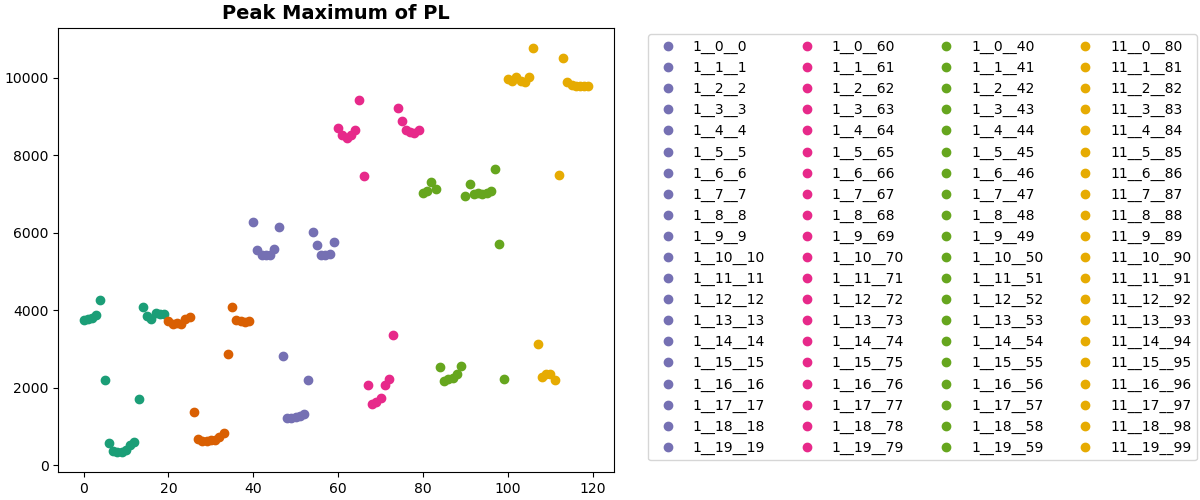

In [17]:
r1 = 335
r2 = 735
df_i[r1:r2].max()
# color_idx = np.linspace(0, 1, df_i.shape[1])
f2, ax2 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax2.plot(i, df_i[r1:r2].max()[i], 'o', color=cmap3(color_idx[i]), label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax2.set_title('Peak Maximum of PL', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5, 1.0, 'Peak Maximum of LED')

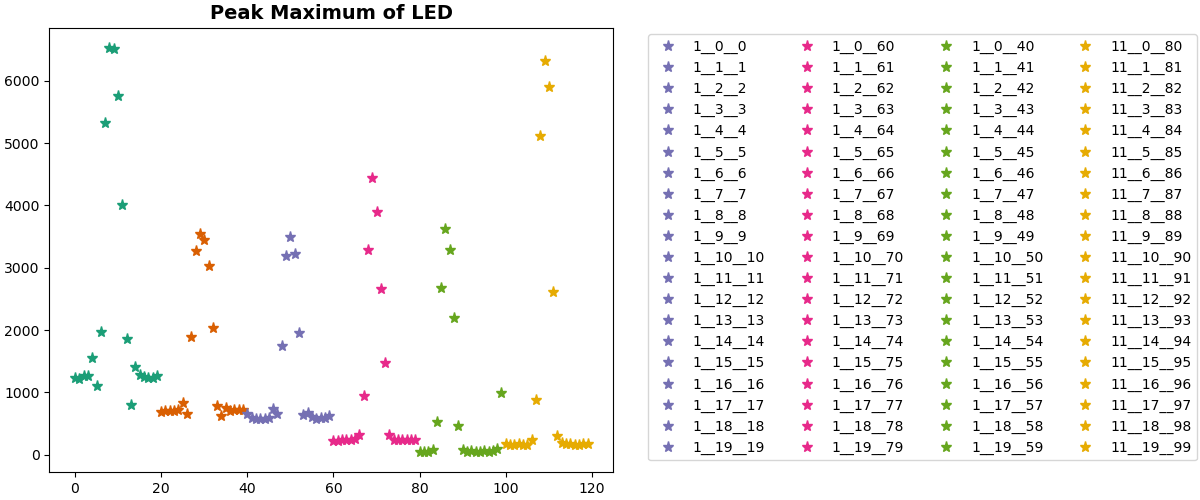

In [18]:
r3 = 150
r4 = 300
# color_idx = np.linspace(0, 1, df_i.shape[1])
f3, ax3 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax3.plot(i, df_i[r3:r4].max()[i], '*', color=cmap3(color_idx[i]), markersize=8, label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax3.set_title('Peak Maximum of LED', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5, 1.0, 'Peak Max of PL vs. LED')

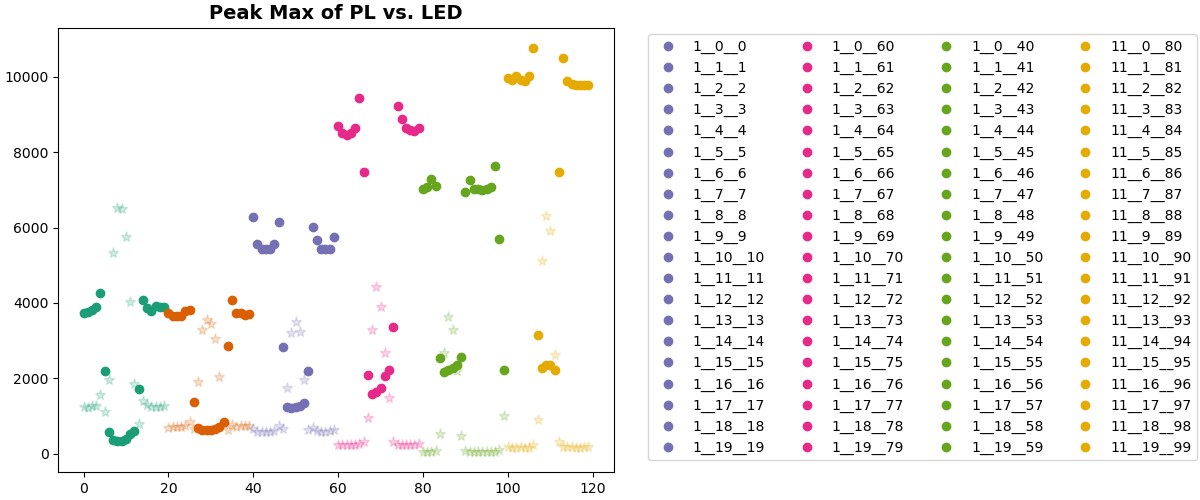

In [19]:
# color_idx = np.linspace(0, 1, df_i.shape[1])
f4, ax4 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax4.plot(i, df_i[r1:r2].max()[i], 'o', color=cmap3(color_idx[i]), label=df_i.columns[i])
    ax4.plot(i, df_i[r3:r4].max()[i], '*', color=cmap3(color_idx[i]), markersize=8, alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax4.set_title('Peak Max of PL vs. LED', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5, 1.0, 'Difference of Peak Max of PL vs. LED')

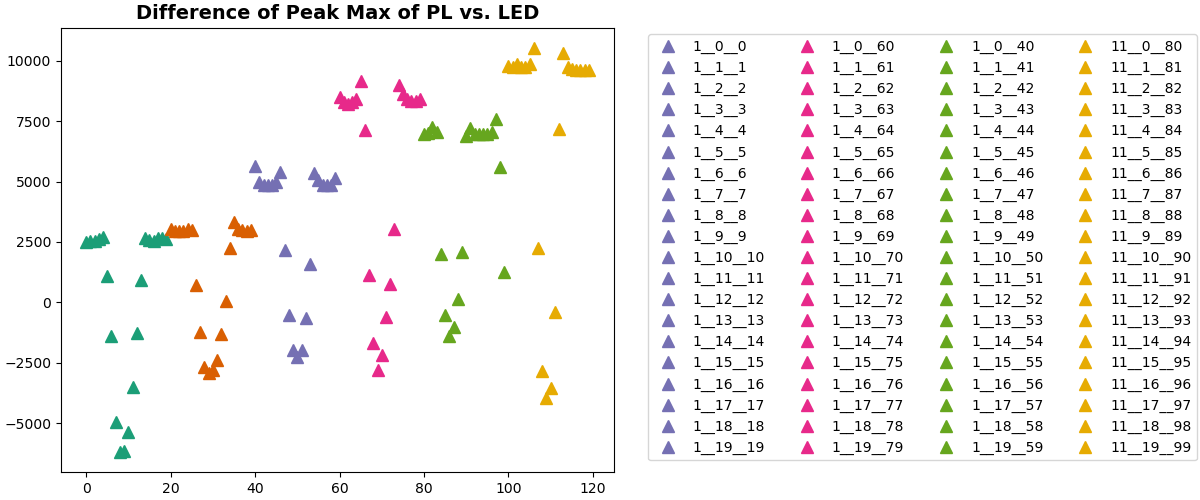

In [20]:
# color_idx = np.linspace(0, 1, df_i.shape[1])
max_ratio = df_i[r1:r2].max() / df_i[r3:r4].max()
max_diff = df_i[r1:r2].max() - df_i[r3:r4].max()
f5, ax5 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax5.plot(i, max_diff[i], '^', color=cmap3(color_idx[i]), markersize=8, label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax5.set_title('Difference of Peak Max of PL vs. LED', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5, 1.0, 'Integration of PL')

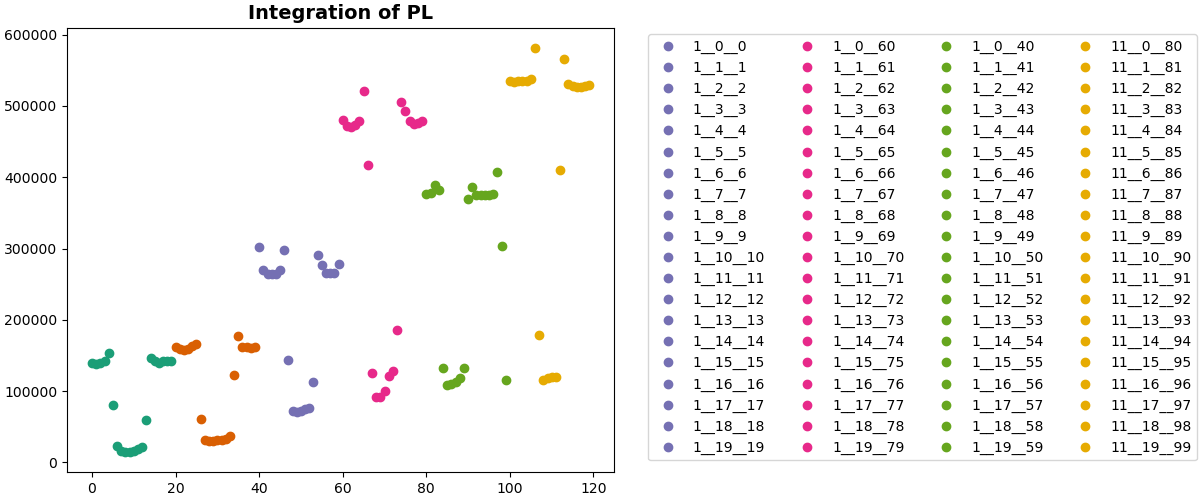

In [21]:
peak_area2 = integrate.simpson(df_i[r1:r2], axis=0)
# color_idx = np.linspace(0, 1, df_i.shape[1])
f6, ax6 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax6.plot(i, peak_area2[i], 'o', color=cmap3(color_idx[i]), label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax6.set_title('Integration of PL', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5, 1.0, 'Integration of LED')

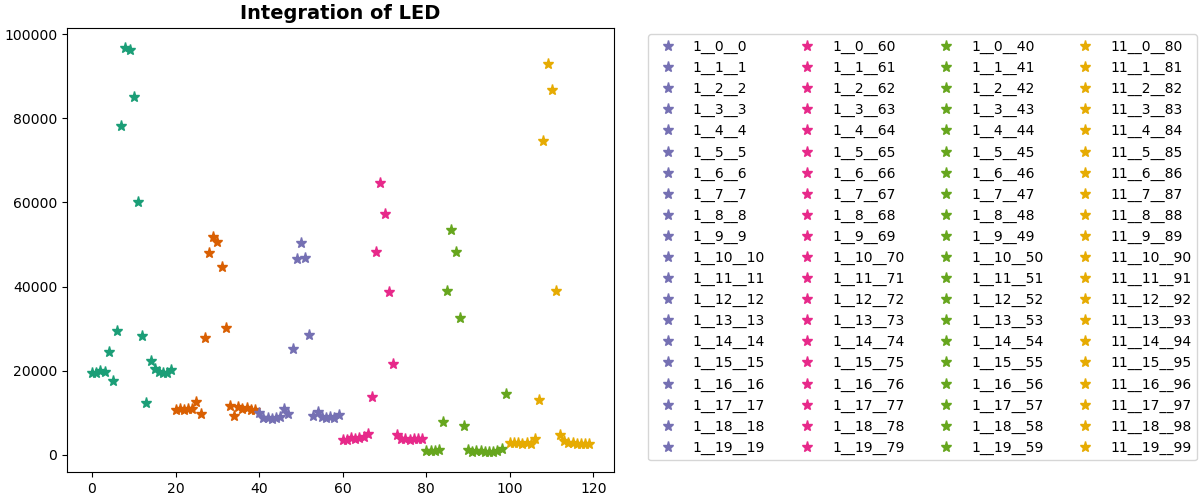

In [22]:
peak_area1 = integrate.simpson(df_i[r3:r4], axis=0)
# color_idx = np.linspace(0, 1, df_i.shape[1])
f7, ax7 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax7.plot(i, peak_area1[i], '*', color=cmap3(color_idx[i]), markersize=8, label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax7.set_title('Integration of LED', fontdict={'fontsize':14, 'fontweight':'bold'})

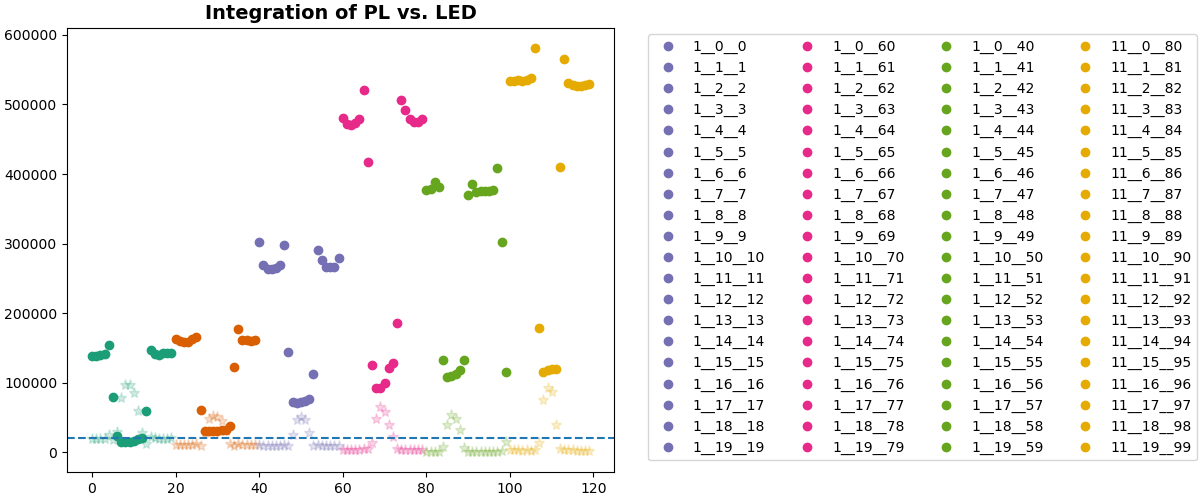

In [23]:
# color_idx = np.linspace(0, 1, df_i.shape[1])
f8, ax8 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax8.plot(i, peak_area2[i], 'o', color=cmap3(color_idx[i]), label=df_i.columns[i])
    ax8.plot(i, peak_area1[i], '*', color=cmap3(color_idx[i]), markersize=8, alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax8.set_title('Integration of PL vs. LED', fontdict={'fontsize':14, 'fontweight':'bold'})
ax8.axhline(y=20000, linestyle = '--')

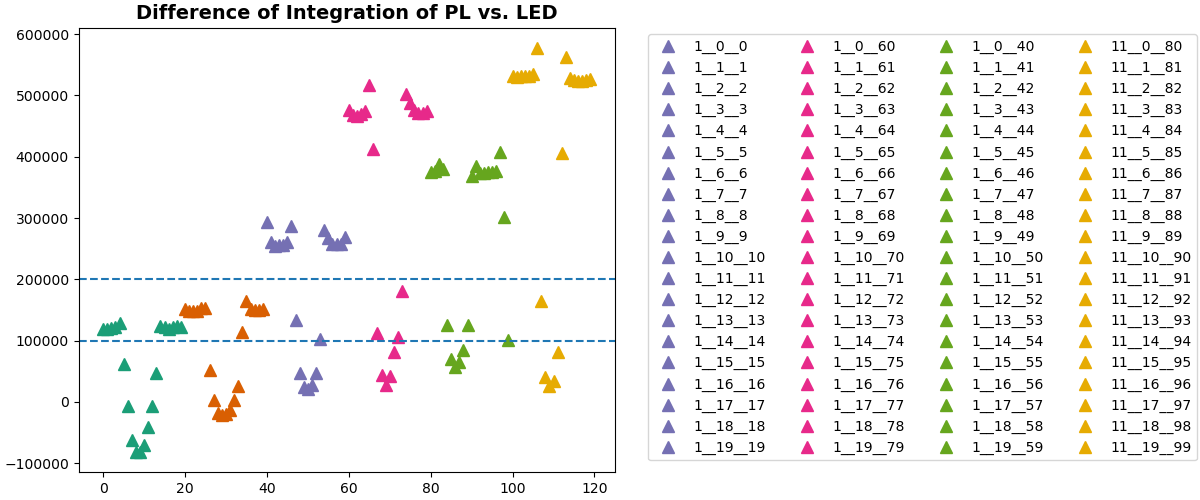

In [24]:
peak_diff = peak_area2 - peak_area1
# color_idx = np.linspace(0, 1, df_i.shape[1])
f9, ax9 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_i.shape[1]):
    ax9.plot(i, peak_diff[i], '^', color=cmap3(color_idx[i]), markersize=8, label=df_i.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax9.set_title('Difference of Integration of PL vs. LED', fontdict={'fontsize':14, 'fontweight':'bold'})
ax9.axhline(y=100000, linestyle = '--')
ax9.axhline(y=200000, linestyle = '--')

(330.0, 770.0)

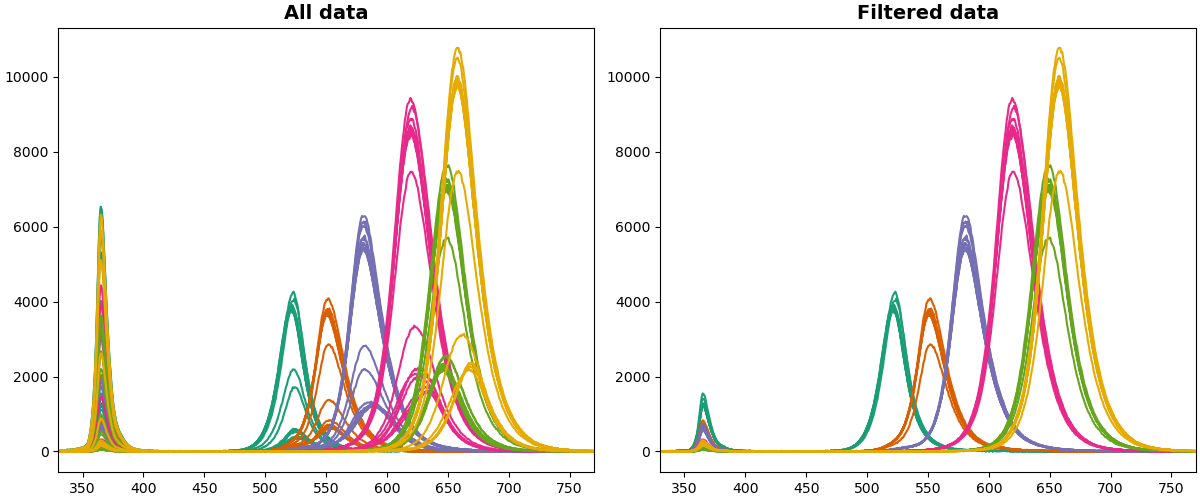

In [25]:
f11, ax11 = plt.subplots(1, 2, figsize = (12, 5), constrained_layout=True)
df_good = pd.DataFrame()
color_idx2 = []
diff_threshold = [100000, 200000]
for i in range(df_i.shape[1]):
    label=df_i.columns[i]
    ax11[0].plot(df_j['Energy'], df_i[label], color=cmap3(color_idx[i]), label=label)
    if i < 40 and peak_diff[i]<diff_threshold[0]:
        pass
    elif i >= 40 and peak_diff[i]<diff_threshold[1]:
        pass
    else:
        ax11[1].plot(df_j['Energy'], df_i[label], color=cmap3(color_idx[i]), label=label)
        df_good = pd.concat([df_good, df_i[label]], axis=1, ignore_index=False)
        color_idx2.append(color_idx[i])

fontdict={'fontsize':14, 'fontweight':'bold'}
ax11[0].set_title('All data', fontdict=fontdict)
ax11[1].set_title('Filtered data', fontdict=fontdict)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax11[0].set_xlim(330, 770)
ax11[1].set_xlim(330, 770)

In [26]:
df_good.shape

(1044, 77)

In [27]:
len(color_idx2)

77

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Text(0.5, 1.0, 'After filtering: Peak Max of PL vs. LED')

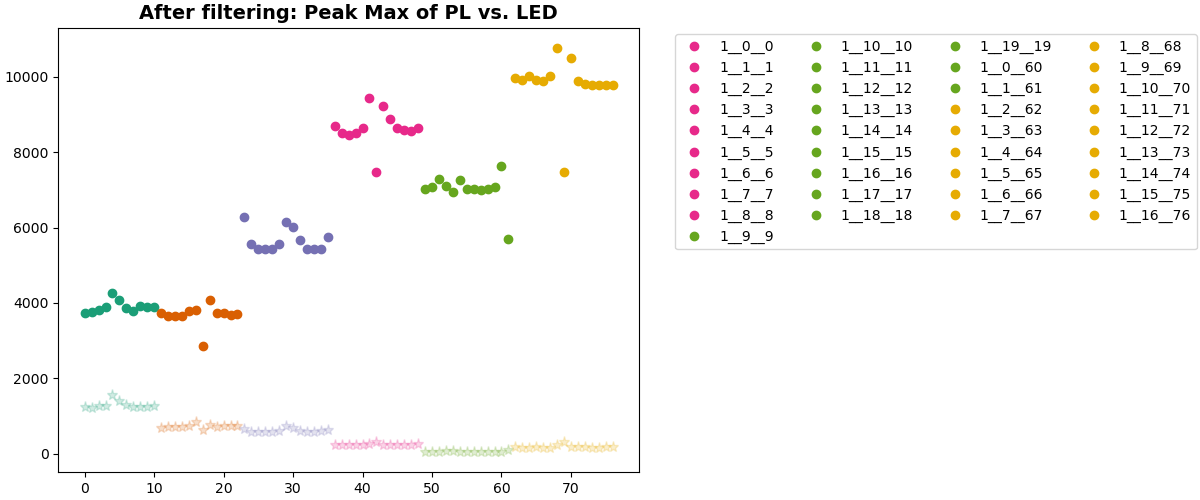

In [28]:
# color_idx = np.linspace(0, 1, df_good.shape[1])
f12, ax12 = plt.subplots(1, 1, figsize = (12, 5), constrained_layout=True)
for i in range(df_good.shape[1]):
    ax12.plot(i, df_good[r1:r2].max()[i], 'o', color=cmap3(color_idx2[i]), label=df_i.columns[i])
    ax12.plot(i, df_good[r3:r4].max()[i], '*', color=cmap3(color_idx2[i]), markersize=8, alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax12.set_title('After filtering: Peak Max of PL vs. LED', fontdict={'fontsize':14, 'fontweight':'bold'})

In [29]:
x = df_j['Energy'].values[r1:r2]
y = df_i[r1:r2].values
PL_find_peaks = []
for i in range(y.shape[1]):
    peaks, _ = find_peaks(y[:,i], distance=50, height=2000)
    if len(peaks) == 1:
        PL_find_peaks.append(peaks[0])
    else:
        PL_find_peaks.append(0)

In [30]:
x.shape
y[:,0].shape

(400,)

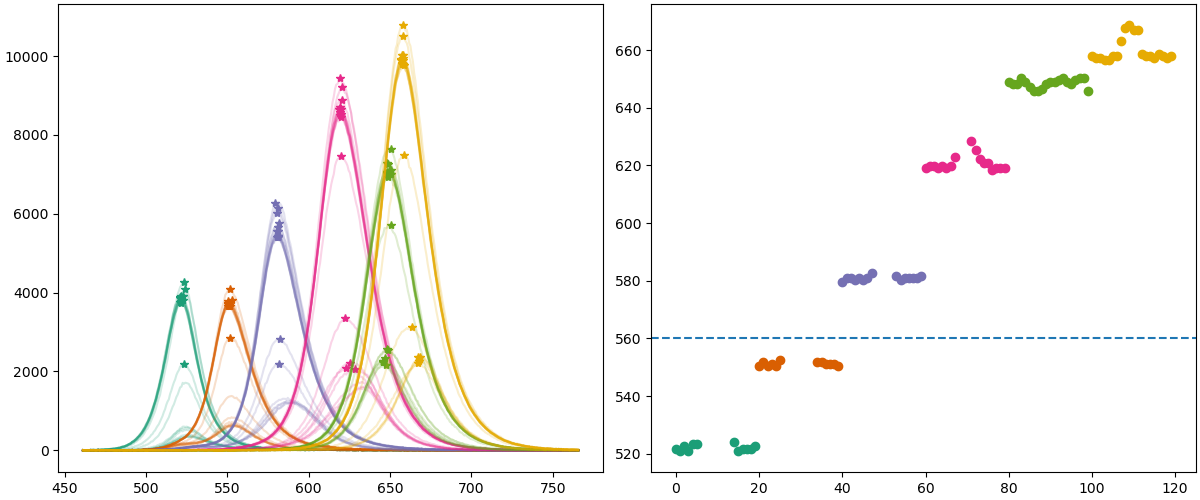

In [31]:
f13, ax13 = plt.subplots(1, 2, figsize = (12, 5), constrained_layout=True)
for i in range(len(PL_find_peaks)):
    ax13[0].plot(x, y[:,i], color=cmap3(color_idx[i]), alpha=0.2)
    if PL_find_peaks[i] != 0:
        ax13[0].plot(x[PL_find_peaks[i]], y[:,i][PL_find_peaks[i]], '*', color=cmap3(color_idx[i]))
        ax13[1].plot(i, x[PL_find_peaks[i]], 'o', color=cmap3(color_idx[i]))
ax13[1].axhline(y=560, linestyle = '--')

## Criteria to identify a bad fluorescence peak
### 1. Peak height < 2000 --> execute in scipy.find_peaks
### 2. PL peak wavelength < 560 nm, and the diference of peak integrstion (PL minus LED) < 100000
### 3. PL peak wavelength >= 560 nm, and the diference of peak integrstion (PL minus LED) < 200000

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


(330.0, 770.0)

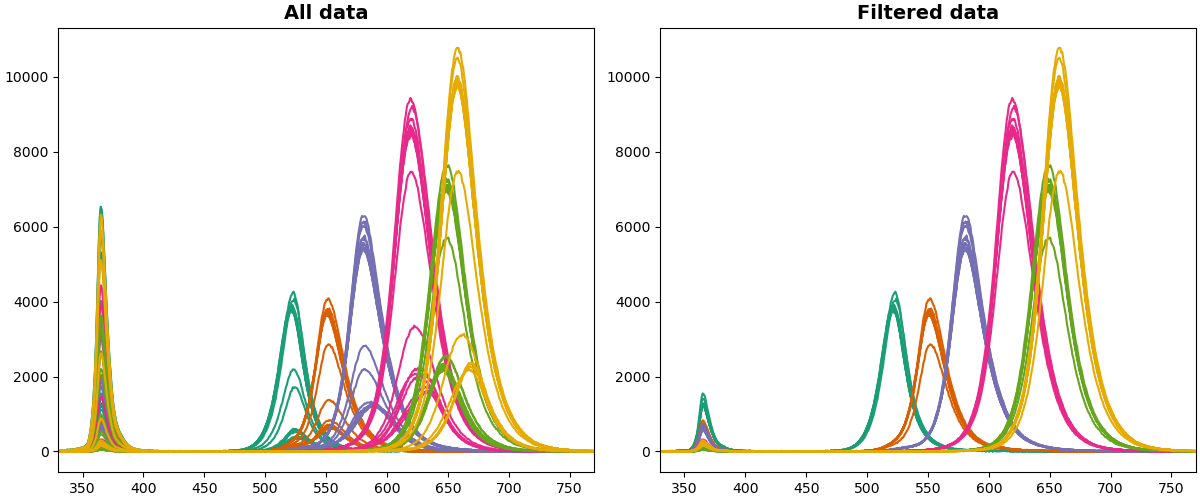

In [32]:
f13, ax13 = plt.subplots(1, 2, figsize = (12, 5), constrained_layout=True)
df_good = pd.DataFrame()
color_idx3 = []
x = df_j['Energy'].values[r1:r2]
diff_threshold = [100000, 200000]
for i in range(df_i.shape[1]):
    label=df_i.columns[i]
    ax13[0].plot(df_j['Energy'], df_i[label], color=cmap3(color_idx[i]), label=label)
    if PL_find_peaks[i] == 0:
        pass
    elif x[PL_find_peaks[i]]<560 and peak_diff[i]<diff_threshold[0]:
        pass
    elif x[PL_find_peaks[i]] >= 560 and peak_diff[i]<diff_threshold[1]:
        pass
    else:
        ax13[1].plot(df_j['Energy'], df_i[label], color=cmap3(color_idx[i]), label=label)
        df_good = pd.concat([df_good, df_i[label]], axis=1, ignore_index=False)
        color_idx3.append(color_idx[i])

fontdict={'fontsize':14, 'fontweight':'bold'}
ax13[0].set_title('All data', fontdict=fontdict)
ax13[1].set_title('Filtered data', fontdict=fontdict)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)
ax13[0].set_xlim(330, 770)
ax13[1].set_xlim(330, 770)

In [33]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

In [34]:
df_j

,wavelength,intensity,Energy,11__19__99
0,196.263,-0.12,196.263,-0.12
1,197.066,0.88,197.066,0.88
2,197.870,-0.12,197.870,-0.12
3,198.673,-1.12,198.673,-1.12
4,199.476,-0.12,199.476,-0.12
...,...,...,...,...
1039,989.419,-1.12,989.419,-1.12
1040,990.139,-1.12,990.139,-1.12
1041,990.860,1.88,990.860,1.88
1042,991.581,0.88,991.581,0.88


In [35]:
df_i.iloc[:,84]

0       4.12
1       0.12
2       1.12
3       2.12
4       0.12
        ... 
1039    0.12
1040   -1.88
1041   -1.88
1042   -2.88
1043   -0.88
Name: 1__4__44, Length: 1044, dtype: float64

In [36]:
good_bad_data(df_j.Energy, df_i['1__4__44'], key_height=2000)

Spectra test is good.


True

In [37]:
good_bad_data(df_j.Energy, df_i['1__4__44'], key_height=2000, c2_c3=True, height=2000, distance=50)

Spectra test is bad.


False

In [38]:
peak, prop = find_peaks(df_i['1__4__44'], height=100, distance=100)

In [39]:
peak

array([213, 579])

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


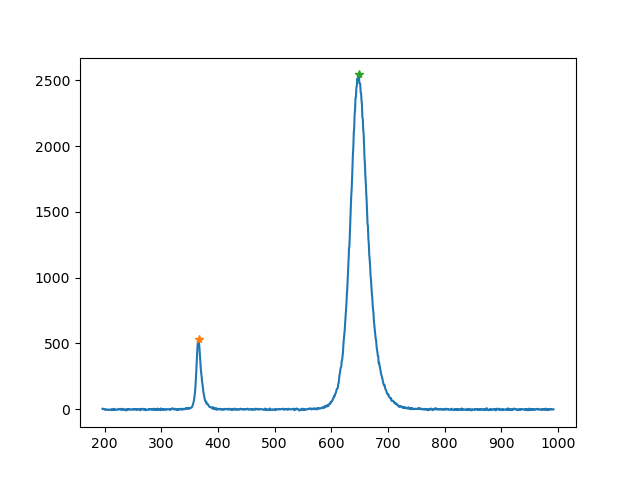

In [40]:
plt.figure()
plt.plot(df_j.Energy, df_i['1__4__44'])
for i in peak:
    plt.plot(df_j.Energy[i], df_i['1__4__44'][i], '*')